In [216]:
using Pkg
using Flux
using YAML
using Images, FileIO

In [217]:
ENV["PYTHON"] = "/home/tekim/haha/bin/python3.9"

"/home/tekim/haha/bin/python3.9"

In [218]:
using Pkg; Pkg.add("PyCall")
Pkg.build("PyCall")

   Resolving package versions...


    Updating `~/.julia/environments/v1.8/Project.toml`
  [438e738f] + PyCall v1.94.1
    Updating `~/.julia/environments/v1.8/Manifest.toml`


  [8f4d0f93] + Conda v1.7.0
  [438e738f] + PyCall v1.94.1
  [81def892] + VersionParsing v1.3.0


In [263]:
using PyCall
glob = pyimport("glob")
cv2 = pyimport("cv2")
imgs = glob.glob("/media/tekim/data/tekim/datasets/aihub_safety/sampled_human_car/test/images/*")



4699-element Vector{String}:
 "/media/tekim/data/tekim/dataset" ⋯ 32 bytes ⋯ "/test/images/S2-N2103M55822.jpg"
 "/media/tekim/data/tekim/dataset" ⋯ 32 bytes ⋯ "/test/images/S2-N1106M24251.jpg"
 "/media/tekim/data/tekim/dataset" ⋯ 32 bytes ⋯ "/test/images/S2-N0107M02191.jpg"
 "/media/tekim/data/tekim/dataset" ⋯ 32 bytes ⋯ "/test/images/S2-N2001M34124.jpg"
 "/media/tekim/data/tekim/dataset" ⋯ 32 bytes ⋯ "/test/images/S2-N0506M20487.jpg"
 "/media/tekim/data/tekim/dataset" ⋯ 32 bytes ⋯ "/test/images/S2-O1103M07460.jpg"
 "/media/tekim/data/tekim/dataset" ⋯ 32 bytes ⋯ "/test/images/S2-O0103M02481.jpg"
 "/media/tekim/data/tekim/dataset" ⋯ 32 bytes ⋯ "/test/images/S2-N0509M32527.jpg"
 "/media/tekim/data/tekim/dataset" ⋯ 32 bytes ⋯ "/test/images/S2-N1901M21303.jpg"
 "/media/tekim/data/tekim/dataset" ⋯ 32 bytes ⋯ "/test/images/S2-N1802M11284.jpg"
 ⋮
 "/media/tekim/data/tekim/dataset" ⋯ 32 bytes ⋯ "/test/images/S2-N2101M05556.jpg"
 "/media/tekim/data/tekim/dataset" ⋯ 32 bytes ⋯ "/test/images/S2-N

In [264]:
img = cv2.imread(imgs[1])

1080×1920×3 Array{UInt8, 3}:
[:, :, 1] =
 0x32  0x1c  0x00  0x00  0x0a  0x2b  …  0x24  0x25  0x24  0x24  0x26  0x25
 0x09  0x01  0x00  0x0c  0x2d  0x38     0x28  0x2a  0x2c  0x2f  0x31  0x31
 0x00  0x00  0x0e  0x2f  0x3a  0x3e     0x25  0x26  0x26  0x28  0x2d  0x30
 0x00  0x0c  0x30  0x39  0x17  0x24     0x20  0x21  0x28  0x27  0x27  0x27
 0x31  0x32  0x34  0x2b  0x18  0x27     0x25  0x22  0x23  0x20  0x25  0x2f
 0x2d  0x31  0x27  0x1d  0x1c  0x23  …  0x24  0x2a  0x35  0x36  0x2f  0x29
 0x1e  0x1f  0x1f  0x1f  0x24  0x2b     0x34  0x2f  0x37  0x40  0x43  0x44
 0x12  0x0e  0x16  0x1f  0x1b  0x25     0x4b  0x4a  0x58  0x6d  0x7c  0x86
 0x22  0x21  0x20  0x2d  0x2c  0x2e     0x7c  0x90  0x9b  0x9a  0xa9  0xb3
 0x35  0x38  0x30  0x28  0x1c  0x21     0xa3  0xa4  0xa4  0xa1  0x9b  0x92
    ⋮                             ⋮  ⋱           ⋮                    
 0x46  0x49  0x48  0x47  0x4b  0x4e     0x9b  0x99  0x99  0x9d  0x9e  0x9d
 0x45  0x44  0x44  0x46  0x49  0x4a     0x96  0x97  0x99  0x9c 

In [225]:
typeof(imgs)

Vector{String} (alias for Array{String, 1})

In [248]:
eltype(img)

RGB{N0f8}

In [249]:
ndims(img)

2

In [250]:
size(img)

(1080, 1920)

In [256]:
typeof(img[1,2])

ErrorException: type DataType has no field typeof

In [259]:
convert(Float32,img[1,2])

MethodError: MethodError: Cannot `convert` an object of type RGB{N0f8} to an object of type Float32
Closest candidates are:
  convert(::Type{T}, !Matched::Gray24) where T<:Real at ~/.julia/packages/ColorTypes/1dGw6/src/conversions.jl:114
  convert(::Type{T}, !Matched::Gray) where T<:Real at ~/.julia/packages/ColorTypes/1dGw6/src/conversions.jl:113
  convert(::Type{T}, !Matched::LLVM.GenericValue, !Matched::LLVM.LLVMType) where T<:AbstractFloat at ~/.julia/packages/LLVM/WjSQG/src/execution.jl:39
  ...

In [245]:
map(Float64, img)

MethodError: MethodError: no method matching Float64(::RGB{N0f8})
Closest candidates are:
  (::Type{T})(!Matched::AbstractChar) where T<:Union{AbstractChar, Number} at char.jl:50
  (::Type{T})(!Matched::Base.TwicePrecision) where T<:Number at twiceprecision.jl:266
  (::Type{T})(!Matched::Flux.NilNumber.Nil) where T<:Number at ~/.julia/packages/Flux/nJ0IB/src/outputsize.jl:18
  ...

In [241]:
channelview(img)

3×1080×1920 reinterpret(reshape, N0f8, ::Array{RGB{N0f8},2}) with eltype N0f8:
[:, :, 1] =
 0.353  0.192  0.106  0.161  0.361  …  0.616  0.612  0.639  0.624  0.627
 0.243  0.082  0.0    0.051  0.259     0.478  0.475  0.502  0.486  0.49
 0.196  0.035  0.0    0.0    0.192     0.329  0.325  0.353  0.337  0.341

[:, :, 2] =
 0.267  0.169  0.133  0.22   0.373  …  0.616  0.612  0.635  0.624  0.627
 0.157  0.059  0.024  0.114  0.275     0.478  0.475  0.498  0.486  0.49
 0.11   0.004  0.0    0.047  0.196     0.329  0.325  0.349  0.337  0.341

[:, :, 3] =
 0.153  0.129  0.22   0.361  0.384  …  0.616  0.612  0.635  0.624  0.627
 0.039  0.016  0.11   0.255  0.278     0.478  0.475  0.498  0.486  0.49
 0.0    0.0    0.055  0.188  0.204     0.329  0.325  0.349  0.337  0.341

;;; … 

[:, :, 1918] =
 0.239  0.282  0.271  0.275  0.255  …  0.788  0.784  0.78   0.765  0.749
 0.184  0.227  0.208  0.212  0.188     0.682  0.678  0.675  0.659  0.643
 0.141  0.184  0.157  0.153  0.125     0.565  0.561  0.557 

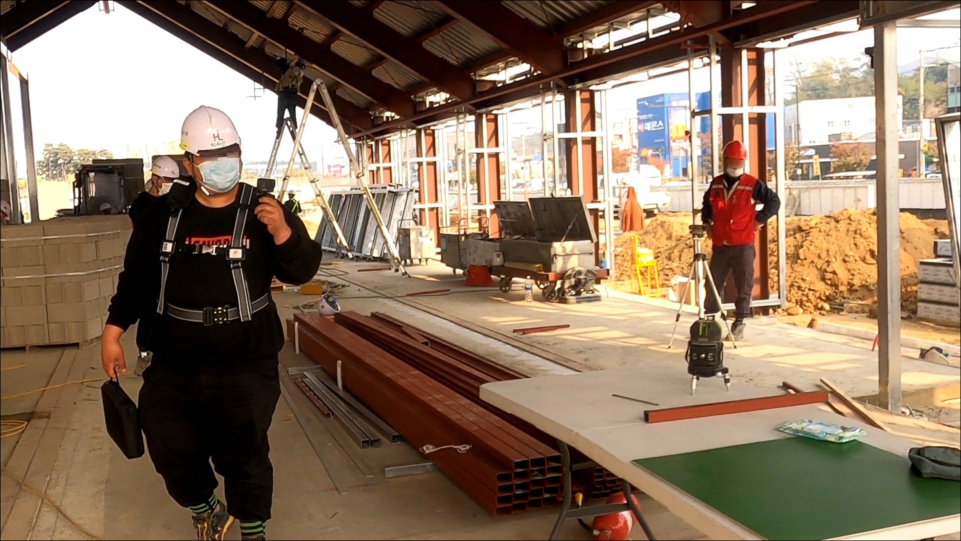

In [233]:
using Images, FileIO
img_path = imgs[1]
img = load(img_path)
# convert(Array{Float64}, img)

In [240]:
img[:,:,:]

1080×1920×1 Array{RGB{N0f8},3} with eltype RGB{N0f8}:
[:, :, 1] =
 RGB{N0f8}(0.353,0.243,0.196)  …  RGB{N0f8}(0.243,0.188,0.145)
 RGB{N0f8}(0.192,0.082,0.035)     RGB{N0f8}(0.29,0.235,0.192)
 RGB{N0f8}(0.106,0.0,0.0)         RGB{N0f8}(0.302,0.239,0.188)
 RGB{N0f8}(0.161,0.051,0.0)       RGB{N0f8}(0.275,0.212,0.153)
 RGB{N0f8}(0.361,0.259,0.192)     RGB{N0f8}(0.314,0.247,0.184)
 RGB{N0f8}(0.353,0.255,0.176)  …  RGB{N0f8}(0.31,0.239,0.161)
 RGB{N0f8}(0.302,0.204,0.118)     RGB{N0f8}(0.431,0.349,0.267)
 RGB{N0f8}(0.255,0.157,0.071)     RGB{N0f8}(0.694,0.608,0.525)
 RGB{N0f8}(0.322,0.227,0.133)     RGB{N0f8}(0.886,0.788,0.702)
 RGB{N0f8}(0.396,0.302,0.208)     RGB{N0f8}(0.757,0.659,0.573)
 ⋮                             ⋱  
 RGB{N0f8}(0.557,0.424,0.275)     RGB{N0f8}(0.82,0.725,0.616)
 RGB{N0f8}(0.557,0.42,0.271)      RGB{N0f8}(0.847,0.749,0.631)
 RGB{N0f8}(0.565,0.427,0.278)     RGB{N0f8}(0.827,0.722,0.604)
 RGB{N0f8}(0.58,0.443,0.294)      RGB{N0f8}(0.808,0.702,0.584)
 RGB{N0f8}(0.616,0.4

In [235]:
Float64.(img)

MethodError: MethodError: no method matching Float64(::RGB{N0f8})
Closest candidates are:
  (::Type{T})(!Matched::AbstractChar) where T<:Union{AbstractChar, Number} at char.jl:50
  (::Type{T})(!Matched::Base.TwicePrecision) where T<:Number at twiceprecision.jl:266
  (::Type{T})(!Matched::Flux.NilNumber.Nil) where T<:Number at ~/.julia/packages/Flux/nJ0IB/src/outputsize.jl:18
  ...

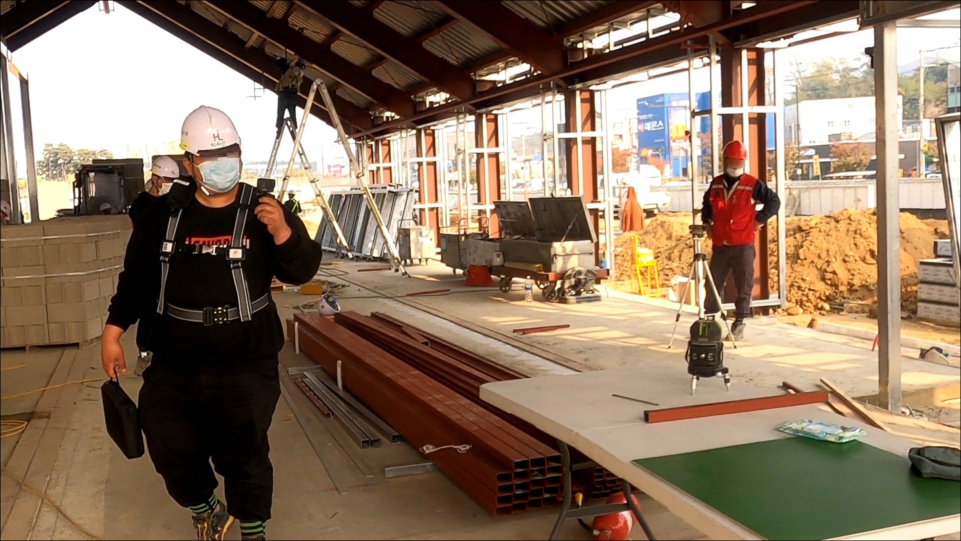

In [230]:
a= Array(img)

In [5]:
yolov7_yaml = YAML.load_file("/media/tekim/data/tekim/temp/yolov7/cfg/training/yolov7.yaml")

Dict{Any, Any} with 6 entries:
  "anchors"        => [[12, 16, 19, 36, 40, 28], [36, 75, 76, 55, 72, 146], [14…
  "head"           => Vector{Any}[[-1, 1, "SPPCSPC", [512]], [-1, 1, "Conv", [2…
  "nc"             => 80
  "depth_multiple" => 1.0
  "backbone"       => Vector{Any}[[-1, 1, "Conv", [32, 3, 1]], [-1, 1, "Conv", …
  "width_multiple" => 1.0

In [6]:
list01 = [1,2,3]
list01[end]

3

In [14]:
function silu(x)
    return x / (1 + exp(-x))
end

silu (generic function with 1 method)

In [173]:
# function LeNet5(; imgsize=(28,28,1), nclasses=10) 
#     out_conv_size = (imgsize[1]÷4 - 3, imgsize[2]÷4 - 3, 16)
    
#     return Chain(
#             Chain(
#             Conv((5, 5), imgsize[end]=>6, relu),
#             MaxPool((2, 2)),
#             Conv((5, 5), 6=>16, relu),
#             MaxPool((2, 2)))
            
#             ,
#             Chain(
#             flatten,
#             Dense(prod(out_conv_size), 120, relu), 
#             Dense(120, 84, relu), 
#             Dense(84, nclasses)
#             )
#           )
# end

LeNet5 (generic function with 1 method)

In [174]:
function LeNet5() 
    return Chain(
        Conv((3,3), 10 => 64 , 1),
        BatchNorm(64, silu)
    )
end
model = LeNet5()

Chain(
  Conv((3, 3), 10 => 64, 1),            # 5_824 parameters
  BatchNorm(64, silu),                  # 128 parameters, plus 128
)         # Total: 4 trainable arrays, 5_952 parameters,
          # plus 2 non-trainable, 128 parameters, summarysize 24.352 KiB.

In [175]:
# model = Chain(
#     Conv((3,3), 10 => 64 , 1),
#     BatchNorm(64, silu)
# )

In [190]:
x = ones(1,3,3,10)
convert(Array{Float16},x)

1×3×3×10 Array{Float16, 4}:
[:, :, 1, 1] =
 1.0  1.0  1.0

[:, :, 2, 1] =
 1.0  1.0  1.0

[:, :, 3, 1] =
 1.0  1.0  1.0

[:, :, 1, 2] =
 1.0  1.0  1.0

[:, :, 2, 2] =
 1.0  1.0  1.0

[:, :, 3, 2] =
 1.0  1.0  1.0

[:, :, 1, 3] =
 1.0  1.0  1.0

[:, :, 2, 3] =
 1.0  1.0  1.0

[:, :, 3, 3] =
 1.0  1.0  1.0

[:, :, 1, 4] =
 1.0  1.0  1.0

[:, :, 2, 4] =
 1.0  1.0  1.0

[:, :, 3, 4] =
 1.0  1.0  1.0

[:, :, 1, 5] =
 1.0  1.0  1.0

[:, :, 2, 5] =
 1.0  1.0  1.0

[:, :, 3, 5] =
 1.0  1.0  1.0

[:, :, 1, 6] =
 1.0  1.0  1.0

[:, :, 2, 6] =
 1.0  1.0  1.0

[:, :, 3, 6] =
 1.0  1.0  1.0

[:, :, 1, 7] =
 1.0  1.0  1.0

[:, :, 2, 7] =
 1.0  1.0  1.0

[:, :, 3, 7] =
 1.0  1.0  1.0

[:, :, 1, 8] =
 1.0  1.0  1.0

[:, :, 2, 8] =
 1.0  1.0  1.0

[:, :, 3, 8] =
 1.0  1.0  1.0

[:, :, 1, 9] =
 1.0  1.0  1.0

[:, :, 2, 9] =
 1.0  1.0  1.0

[:, :, 3, 9] =
 1.0  1.0  1.0

[:, :, 1, 10] =
 1.0  1.0  1.0

[:, :, 2, 10] =
 1.0  1.0  1.0

[:, :, 3, 10] =
 1.0  1.0  1.0

In [191]:
Flux.params(model)[1]

3×3×10×64 Array{Float32, 4}:
[:, :, 1, 1] =
 -0.00067768  -0.00182009   0.0221326
  0.0233967    0.0543981   -0.00941689
 -0.0475784   -0.044113    -0.021041

[:, :, 2, 1] =
  0.0279637  -0.0790779  0.0892101
 -0.0118657  -0.06615    0.0687553
  0.0396228  -0.093324   0.0709247

[:, :, 3, 1] =
 0.0740955   0.0286385  -0.0377716
 0.0230357  -0.0586264   0.0493211
 0.0365453  -0.0487607  -0.0194128

[:, :, 4, 1] =
 -0.0429566   0.0270081  -0.0678057
 -0.0395884   0.0642247   0.0328616
  0.0696195  -0.0939618  -0.0263194

[:, :, 5, 1] =
 0.0222494  -0.0126371  -0.067554
 0.0426145   0.0721348   0.00278287
 0.0444933  -0.0299631   0.0841015

[:, :, 6, 1] =
  0.0932797    0.0230331   0.0836865
 -0.00342819   0.0446482   0.0564955
 -0.0255737   -0.0736627  -0.0686949

[:, :, 7, 1] =
  0.0596886  -0.0661382  -0.0389348
 -0.0630517   0.0295882  -0.0946126
  0.074486    0.0816223   0.0860647

[:, :, 8, 1] =
  0.0030126  -0.0472952  -0.0351294
  0.0118589   0.037074   -0.0303639
 -0.0148122   0.

In [192]:
gs = Flux.gradient(Flux.params(model)) do 
     = model(x)    
end


MethodError: MethodError: no method matching fast_act(::Int64, ::Array{Float64, 4})
Closest candidates are:
  fast_act(!Matched::typeof(tanh), ::AbstractArray) at ~/.julia/packages/NNlib/Rh36b/src/activations.jl:832
  fast_act(!Matched::typeof(σ), ::AbstractArray) at ~/.julia/packages/NNlib/Rh36b/src/activations.jl:833
  fast_act(!Matched::F, ::AbstractArray) where F<:Function at ~/.julia/packages/NNlib/Rh36b/src/activations.jl:831

In [58]:
gs = Flux.gradient(Flux.params(model)) do
    ŷ = model(x)
    loss(ŷ, y)
end

MethodError: MethodError: no method matching fast_act(::Int64, ::Vector{Vector{Int64}})
Closest candidates are:
  fast_act(!Matched::typeof(tanh), ::AbstractArray) at ~/.julia/packages/NNlib/Rh36b/src/activations.jl:832
  fast_act(!Matched::typeof(σ), ::AbstractArray) at ~/.julia/packages/NNlib/Rh36b/src/activations.jl:833
  fast_act(!Matched::F, ::AbstractArray) where F<:Function at ~/.julia/packages/NNlib/Rh36b/src/activations.jl:831

In [22]:

x = Flux.params(model)

Params([[-0.0780563 -0.051893864 -0.018746708; -0.04871283 -0.010332422 0.07177068; -0.066761814 -0.0703136 0.027414909;;; -0.092592545 0.028753523 -0.07759904; -0.026945647 -0.018617503 0.075390294; 0.07308345 -0.062802345 -0.045393437;;; -0.08273431 -0.054588877 -0.056459334; 0.00671355 -0.044529222 0.02007988; -0.08291935 0.022432778 0.091432154;;; 0.02630172 0.0267406 0.06465265; -0.08933271 -0.017396858 0.024108337; -0.048071004 0.044684824 -0.06720888;;; 0.055084627 0.04499441 0.038355086; 0.07618826 0.028467098 -0.023091676; -0.057885252 0.04704259 0.055851027;;; 0.040963937 0.054743867 0.0767014; 0.0015136434 -0.0058752447 0.063301705; 0.026650555 0.0068650106 0.09101245;;; -0.07816008 -0.027217543 0.07571618; 0.063989 -0.04938948 0.07977471; -0.016233204 0.050510712 -0.041332915;;; -0.03140055 0.041171044 0.01767097; -0.044993073 0.023457892 -0.015689267; 0.024309084 -0.06827626 0.04964497;;; 0.06434385 0.046827346 -0.025317114; -0.039040234 0.034615833 0.07797715; -0.0615125 

In [26]:
f(x) = 3x^2 + 2x + 1
df(x) = Flux.gradient(f,x)
df(2)

(14.0,)

In [62]:
f(x, y) = sum((x .- y).^2);

Flux.gradient(f,[2,1],[2,0])

([0.0, 2.0], [-0.0, -2.0])

In [67]:
num_params(model) = sum(length, Flux.params(model)) 

num_params (generic function with 1 method)

In [68]:
num_params(model)

5952

In [156]:
Flux.params(model)

Params([[-0.0780563 -0.051893864 -0.018746708; -0.04871283 -0.010332422 0.07177068; -0.066761814 -0.0703136 0.027414909;;; -0.092592545 0.028753523 -0.07759904; -0.026945647 -0.018617503 0.075390294; 0.07308345 -0.062802345 -0.045393437;;; -0.08273431 -0.054588877 -0.056459334; 0.00671355 -0.044529222 0.02007988; -0.08291935 0.022432778 0.091432154;;; 0.02630172 0.0267406 0.06465265; -0.08933271 -0.017396858 0.024108337; -0.048071004 0.044684824 -0.06720888;;; 0.055084627 0.04499441 0.038355086; 0.07618826 0.028467098 -0.023091676; -0.057885252 0.04704259 0.055851027;;; 0.040963937 0.054743867 0.0767014; 0.0015136434 -0.0058752447 0.063301705; 0.026650555 0.0068650106 0.09101245;;; -0.07816008 -0.027217543 0.07571618; 0.063989 -0.04938948 0.07977471; -0.016233204 0.050510712 -0.041332915;;; -0.03140055 0.041171044 0.01767097; -0.044993073 0.023457892 -0.015689267; 0.024309084 -0.06827626 0.04964497;;; 0.06434385 0.046827346 -0.025317114; -0.039040234 0.034615833 0.07797715; -0.0615125 

In [152]:
x = [2, 1];
y = [2, 0];

gs = gradient(Flux.params(x, y)) do
    f(x, y)
  end

Grads(...)

0.0

In [141]:
gs = gradient(Flux.params(x, y)) do 
    model
end

Grads(...)

In [142]:
typeof(gs)

Zygote.Grads

In [145]:
map(1:10)


MethodError: MethodError: objects of type UnitRange{Int64} are not callable
Use square brackets [] for indexing an Array.

In [151]:
gs = gradient(Flux.params(x, y)) do
    x
end

ErrorException: Output is an array, so the gradient is not defined. Perhaps you wanted jacobian.

In [139]:
gs = gradient(f, x,y)

([0.0, 2.0], [-0.0, -2.0])

In [131]:
gs[x]

2-element Vector{Float64}:
 0.0
 2.0

In [133]:
map(1:10) do x
    2x
end

10-element Vector{Int64}:
  3
  6
  9
 12
 15
 18
 21
 24
 27
 30

In [79]:
Flux.params(x, y)

Params([[2, 1], [2, 0]])

In [80]:
f(x,y)

1

In [87]:
map(1:10)

MethodError: MethodError: objects of type UnitRange{Int64} are not callable
Use square brackets [] for indexing an Array.

In [86]:
[1,2,3] do i
    i
end

ErrorException: syntax: extra token "do" after end of expression

In [78]:
gs[x]

2-element Vector{Float64}:
 0.0
 2.0

In [37]:
print(typeof(gs))

Zygote.Grads

In [24]:
Flux.gradient(x)

MethodError: MethodError: objects of type Zygote.Params{Zygote.Buffer{Any, Vector{Any}}} are not callable

In [11]:
list01 .- 2

3-element Vector{Int64}:
 -1
  0
  1

In [106]:
function silu(x)
    return x / (1 + exp(-x))
end

silu (generic function with 1 method)

In [131]:
function Conv(args)
    return 1
    # return Chain(
    #     Conv2d((args[2],arg[2]),3 => args[1],stride=args[3]),
    #     BatchNorm(64, silu)
    # )
end

Conv

In [132]:
model = Chain(
    Conv((3,3), 10 => 64 , 1),
    BatchNorm(64, silu)
)

Chain(
  Conv((3, 3), 10 => 64, 1),            # 5_824 parameters
  BatchNorm(64, silu),                  # 128 parameters, plus 128
)         # Total: 4 trainable arrays, 5_952 parameters,
          # plus 2 non-trainable, 128 parameters, summarysize 24.352 KiB.

In [53]:
"awe" isa Number

false

In [135]:
ch = [3]
count = 0
list01 = Vector{Any}()
for i in [yolov7_yaml["backbone"]; yolov7_yaml["head"]]
    count += 1
    f, n, m, args = i[1], i[2], i[3], i[4]

    if length(args) >=1 && args[1] isa Number
        if m in ["Conv"]
            # print(typeof((ch,args)))
            print(args)
            print(typeof(args))
            append!(list01, [Conv(args)])
        end
    end
    # print(typeof(m))
    
    if count == length([yolov7_yaml["backbone"]; yolov7_yaml["head"]])
        print(list01)
        print(typeof(list01))
        print(typeof(args))
    end

    if count == 1
        ch = []
    end
end

[32, 3, 1]Vector{Int64}

ArgumentError: ArgumentError: tuple length should be ≥ 0, got -1